In [1]:
import numpy as np 
import pandas as pd

import plotly.express as px

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The Attributess include: <br><br>
Age: age of the patient [years]<br><br>
Sex: sex of the patient [M: Male, F: Female]<br><br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br><br>
Cholesterol: serum cholesterol [mm/dl]<br><br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br><br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br><br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br><br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br><br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br><br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br><br>

What we are going to do is: 

Understanding the given dataset and helps clean up the given dataset. <br>
It gives you a clear picture of the features and the relationships between them.<br>
Providing guidelines for essential variables and leaving behind/removing non-essential variables.<br>
Handling Missing values or human error.<br>
Identifying outliers.<br>
EDA process would be maximizing insights of a dataset.<br>
This process is time-consuming but very effective,<br>

Its necessary to remove correlated variables to improve the model

In [5]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [6]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

Let's see the distribution of HeartDisease respect to some important attribute such as Age, Gender

In [7]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [8]:
sub_df = df[(df["HeartDisease"] == 1) & (df["Sex"] == "F")]
fig = px.histogram(data_frame=sub_df, 
                   x="Age", 
                   hover_data=df.columns,
                   title="Distribution of Female patient positive to Heart Disease")
fig.show()

In [9]:
sub_df = df[(df["HeartDisease"] == 1) & (df["Sex"] == "M")]
fig = px.histogram(data_frame=sub_df, 
                   x="Age", 
                   hover_data=df.columns,
                   title="Distribution of Male patient positive to Heart Disease")
fig.show()

In [10]:
sub_df = df[(df["HeartDisease"] == 0) & (df["Sex"] == "F")]
fig = px.histogram(data_frame=sub_df, 
                   x="Age", 
                   hover_data=df.columns,
                   title="Distribution of Female patient negative to Heart Disease")
fig.show()

In [11]:
sub_df = df[(df["HeartDisease"] == 0) & (df["Sex"] == "M")]
fig = px.histogram(data_frame=sub_df, 
                   x="Age", 
                   hover_data=df.columns,
                   title="Distribution of Female patient positive to Heart Disease")
fig.show()

Gender Ratio: 

In [12]:
fig = px.histogram(data_frame=df, x="Sex", hover_data=df.columns, title="Gender Ratio")
fig.show()

Distribution of Chest Pain Type: 

In [13]:
fig = px.histogram(data_frame=df, x="ChestPainType", hover_data=df.columns, title="Distribution of Chest Pain Type")
fig.show()

Resting ECG Distribution

In [14]:
fig = px.histogram(df, x="RestingECG", hover_data=df.columns, title="Resting ECG Distibution")
fig.show()

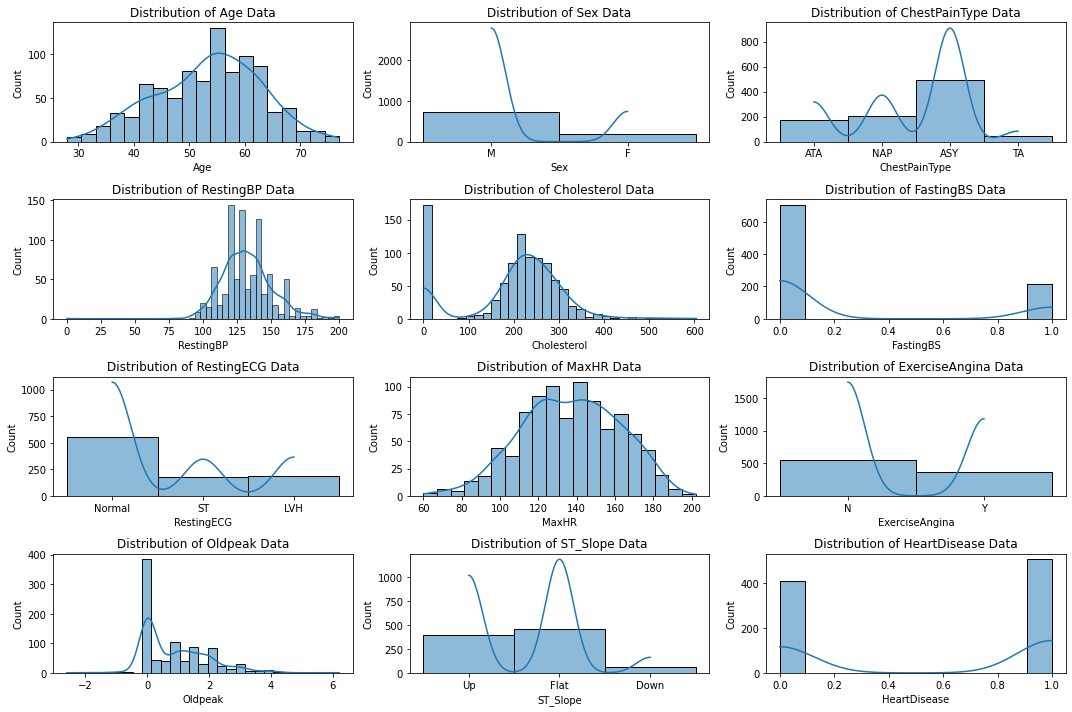

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

Outlier:

In [16]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

There are some outlier, some people as the age of under 35

In [17]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [18]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

Preprocessing

Convert string to numerical

In [19]:
from sklearn.preprocessing import LabelEncoder

for feature in df.columns:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

# X = df.drop(columns=["HeartDisease"])
# Y = df[["HeartDisease"]]

Logistic Regression: Determine if the patient is Positive or Negative to HeartDisease

In [20]:
from sklearn.metrics import classification_report, accuracy_score

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

feature_col_nontree=df.columns.to_list()
feature_col_nontree.remove("HeartDisease")

kf = KFold(n_splits=10, shuffle=True, random_state=11)
for i, (train, test) in enumerate(kf.split(df)):
    X_train = df.loc[train,feature_col_nontree]
    y_train = df.loc[train,"HeartDisease"]
    y_test = df.loc[test,"HeartDisease"]
    X_test = df.loc[test,feature_col_nontree]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_test=ro_scaler.transform(X_test)


    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Fold {i}: ")
    print(classification_report(y_pred=y_pred, y_true=y_test))
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    print("Accuracy score: {0}".format(acc))

Fold {i}: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.90      0.83        48

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.82      0.82      0.81        92

Accuracy score: 0.8152173913043478
Fold {i}: 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.83        51

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.80      0.80      0.80        92

Accuracy score: 0.8043478260869565
Fold {i}: 
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        54

    accuracy                           0.83        92
   macro avg       0.82  